# **Assignment 9**

In [25]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts, cross_val_score, KFold
from sklearn.metrics import accuracy_score
#plotly or other graphing library
import seaborn as sns

In [26]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [27]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
iris_target_names = list(iris.target_names)
print(iris_target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [29]:
X = iris.data
y = [iris_target_names[i] for i in iris.target]

knn = KNN(n_neighbors=5)
knn.fit(X, y)


new_observations = [
    [5.1, 3.5, 1.4, 0.2],
    [6.0, 2.9, 4.5, 1.5],
    [6.3, 3.3, 6.0, 2.5]
]

new_predictions = knn.predict(np.array(new_observations))
print(new_predictions)


['setosa' 'versicolor' 'virginica']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [30]:
def iris_df_knn(split_rate, n_neighbors):
    X_train, X_test, y_train, y_test = tts(X, y, test_size=split_rate, random_state=25)
    knn = KNN(n_neighbors=n_neighbors)

    kf = KFold(n_splits=5, shuffle=True, random_state=25)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=kf)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy, cv_scores.mean()

split_rate = 0.3
n_neighbors = 5 

iris_accuracy, cv_accuracy = iris_df_knn(split_rate, n_neighbors)
print(f'Accuracy with {int(split_rate*100)}% test size and {n_neighbors} neighbors: {iris_accuracy}')
print(f'Cross validation accuracy: {cv_accuracy}')


Accuracy with 30% test size and 5 neighbors: 0.9555555555555556
Cross validation accuracy: 0.980952380952381


From model accuracy results we can see:
* KNN with 5 neighbors works well on Iris dataset (accuracy = 0.96), and model is not overfitting badly
* Cross Validation method gave us slightly better accuracy = 0.98, because with CV model gets more combinations of data across folds, and estimates are closer to true results.

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

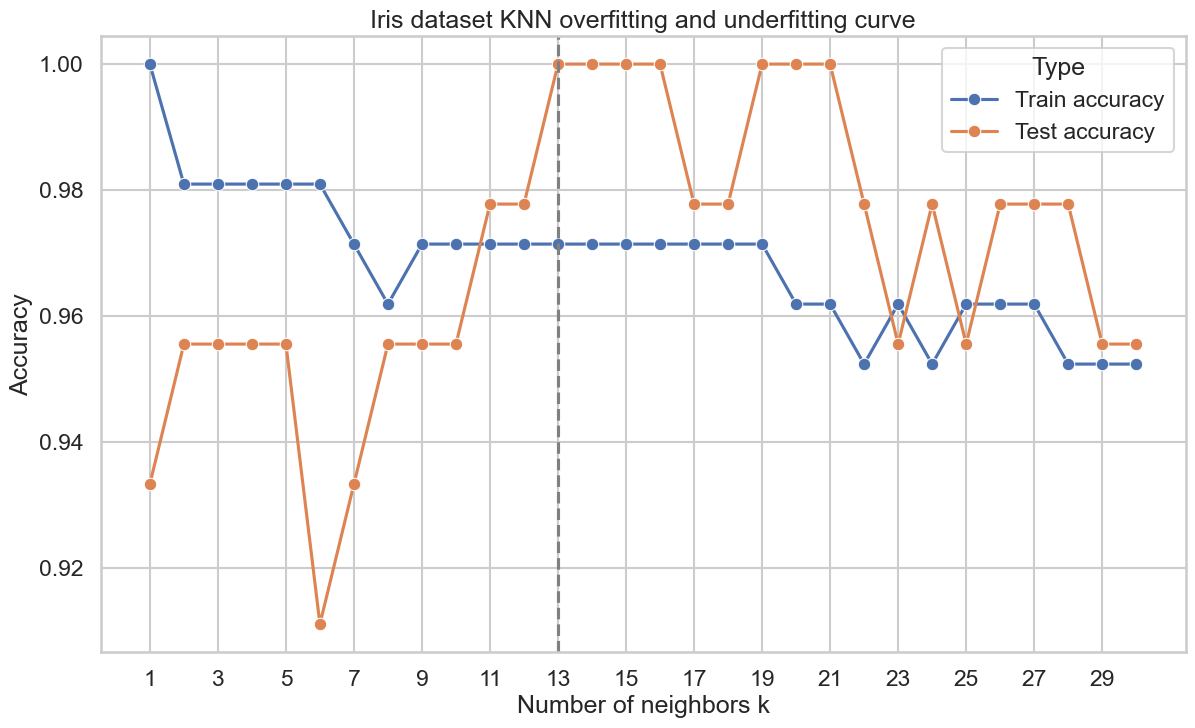

In [31]:
k_values = range(1, 31)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=25)
train_accuracy_scores = []
test_accuracy_scores = []

for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy_scores.append(
        accuracy_score(y_train, knn.predict(X_train))
        )
    
    test_accuracy_scores.append(
        accuracy_score(y_test, knn.predict(X_test))
    )

accuracy_scores_df = pd.DataFrame({
    'k': k_values,
    'Train accuracy': train_accuracy_scores,
    'Test accuracy': test_accuracy_scores
})

accuracy_scores_df_melted = accuracy_scores_df.melt(
    id_vars='k',
    var_name='Type',
    value_name="Accuracy"
)

best_k = accuracy_scores_df.loc[
    accuracy_scores_df['Test accuracy'].idxmax(), 'k'
]


sns.set_theme(style='whitegrid', context='talk')

plt.figure(figsize=(14,8))

sns.lineplot(accuracy_scores_df_melted,
             x='k',
             y='Accuracy',
             hue='Type',
             marker='o')

plt.title('Iris dataset KNN overfitting and underfitting curve')

plt.xlabel('Number of neighbors k')
plt.ylabel('Accuracy')
plt.xticks(range(1,31,2))
plt.axvline(best_k, color='gray', linestyle='--', label=f'Best k = {best_k}')
plt.show()

* As k increases, the model transitions from overfitting (k=1) to a more stable, well-generalized region around k≈12–17, and eventually to underfitting when k becomes too large, where accuracy drops because the model becomes overly smooth.
* At k = 13 we get a sweet spot with closest training (0.97) and test (1.0) accuracies.